<a href="https://colab.research.google.com/github/fakeharahman/IIIT-Midas-task-2/blob/main/IIID_part_2_and_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#IIITD Part 2

Below we first import the libraries we need. 

The cell below installs the livelossplot library to the notebook. If you are using google colab, that is the only library you need to install. The rest of the libraries needed for this project is already installed.


In [ ]:
pip install livelossplot

In [2]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from keras.models import Sequential, Model
from keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from livelossplot.tf_keras import PlotLossesCallback
from keras.models import load_model
from keras.utils import to_categorical
%matplotlib inline

The next block unzips the folder. If you are using google colab, then import the dataset in a zipped folder into the runtime and run the block. **Only run the below block if you are using google colab.**

In [3]:
from zipfile import ZipFile
file_name = "MNIST0-9.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


We take the image size to be 28*28 since that is the image size of the MNIST dataset. The dataset path is the path to the 0-9 from the given dataset.

In [4]:
imageSize=[28, 28]
dataset_path="MNIST0-9"

##Preprocessing

Here we split the data into 2 parts, training and validation. 20% of the data goes into the validation dataset. We increase the dataset by changing the images a little as written in the below line of code. Next we crete both the datasets.


In [5]:
image_generator = ImageDataGenerator(rescale=1/255, validation_split=0.167, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)    
train_dataset = image_generator.flow_from_directory(
                                                 directory=dataset_path,
                                                 shuffle=True,
                                                 target_size=(28, 28), 
                                                    color_mode="grayscale",
                                                 subset="training",
                                                 class_mode='categorical')

validation_dataset = image_generator.flow_from_directory(
                                                 directory=dataset_path,
                                                         color_mode="grayscale",
                                                 shuffle=True,
                                                 target_size=(28, 28), 
                                                 subset="validation",
                                                 class_mode='categorical')

Found 340 images belonging to 10 classes.
Found 60 images belonging to 10 classes.


#Creating the model
We create a function that creates the model. The model used here is the same as the model in part one. Then we call the function to create the model. 

In [6]:
def create_model():
    model=Sequential()
    model.add(Conv2D(64, kernel_size=(3,3), activation="relu", input_shape=imageSize+[1]))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(48, kernel_size=(3,3), activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(64, kernel_size=(3,3), activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(160, activation="relu"))
    model.add(Dropout(0.5))
    model.add(Dense(84, activation="relu"))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation="softmax"))
    return model

model=create_model()
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 48)        27696     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 48)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 48)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          2

Next we compile the model with the same specifications as part one of this task. Then, we create the model checkpoint and save it as model_weights_1.

In [7]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [8]:
%%time

chkpt = ModelCheckpoint("model_weights_1.h5", monitor='val_loss',verbose=1, save_best_only=True, save_weights_only=True, mode='min')


callbacks = [PlotLossesCallback(), chkpt]

CPU times: user 466 µs, sys: 0 ns, total: 466 µs
Wall time: 473 µs


##Running the model on the 0-9 data

The epochs are kept as 20 because the model doesnt perform better on increasing it.

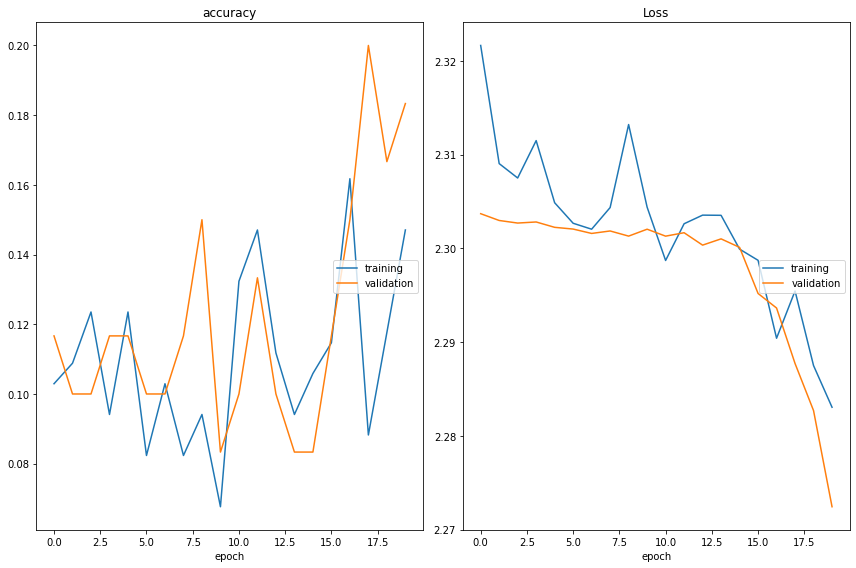

accuracy
	training         	 (min:    0.068, max:    0.162, cur:    0.147)
	validation       	 (min:    0.083, max:    0.200, cur:    0.183)
Loss
	training         	 (min:    2.283, max:    2.322, cur:    2.283)
	validation       	 (min:    2.272, max:    2.304, cur:    2.272)

Epoch 00020: val_loss improved from 2.28269 to 2.27243, saving model to model_weights_1.h5


In [9]:

r=model.fit_generator(train_dataset, validation_data=validation_dataset, epochs=20, steps_per_epoch=len(train_dataset), validation_steps=len(validation_dataset), callbacks=callbacks)

In [10]:
acc = model.evaluate(validation_dataset)

2/2 [==============================] - 1s 342ms/step - loss: 2.2804 - accuracy: 0.1833


The model does not perform very well on the given dataset. The accuracy achieved is 14.7% for the training data and 18.3% on the validation data. The loss is 2.283 for the training data and 2.280 for the validation data. The accuracy graph fluctuates a lot for the validation data.
<br>
<br>
Next, we save the weights again.

In [11]:
model.save_weights('model_weights_2.h5')

#Running pretrained model on MNIST dataset

For simplicity purposes, we create a new model called model pretrained and load the weights from the previous model.

In [12]:
model_pretrained=create_model()
model_pretrained.load_weights('model_weights_2.h5')

model_pretrained.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 48)        27696     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 48)          0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 5, 5, 48)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 64)         

Now we load the MNIST dataset from keras. The dataset is divided into two parts- training and test where training dataset has 60,000 images and the test set has 10,000 images. After it gets loaded, we reshape the dataset to be in a single channel.

In [13]:
from tensorflow.keras.datasets import mnist

def load_dataset():
    (trainX, trainY), (testX, testY) = mnist.load_data()
    trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
    testX = testX.reshape((testX.shape[0], 28, 28, 1))
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    return trainX, trainY, testX, testY
trainX, trainY, testX, testY=load_dataset()
print(trainX.shape, testX.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


Now, we compile it in the same was as we did before and create the checkpoints.

In [14]:
model_pretrained.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [15]:
%%time

chkpt = ModelCheckpoint("model_weights_part_2_pretrained.h5", monitor='val_loss',verbose=1, save_best_only=True, save_weights_only=True, mode='min')

callbacks = [PlotLossesCallback(), chkpt]

CPU times: user 127 µs, sys: 6 µs, total: 133 µs
Wall time: 136 µs


Below, we train the **pretrained** model on the mnist dataset. 

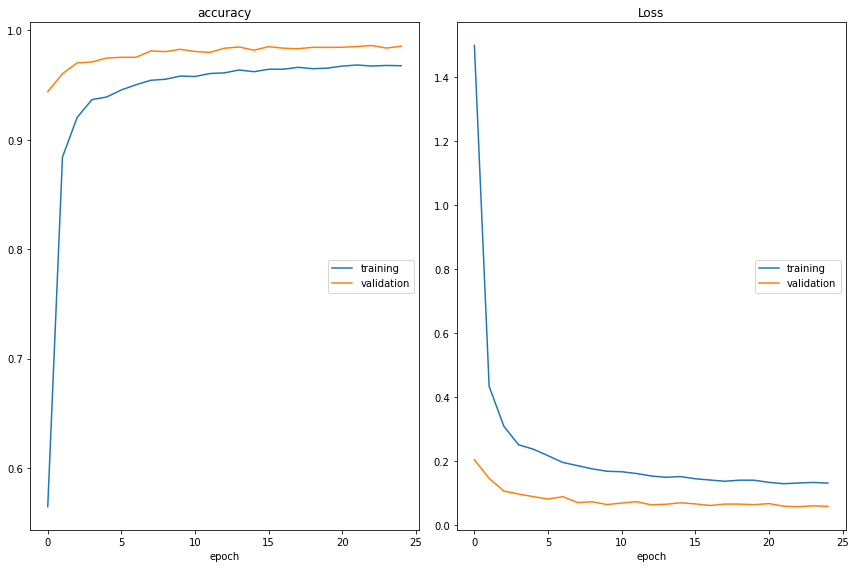

accuracy
	training         	 (min:    0.565, max:    0.968, cur:    0.968)
	validation       	 (min:    0.944, max:    0.986, cur:    0.985)
Loss
	training         	 (min:    0.130, max:    1.500, cur:    0.132)
	validation       	 (min:    0.058, max:    0.205, cur:    0.059)

Epoch 00025: val_loss did not improve from 0.05774


In [16]:
r2=model_pretrained.fit(trainX, trainY, validation_data=(testX, testY), epochs=25, batch_size=64,  callbacks=callbacks)

In [17]:
acc = model_pretrained.evaluate(testX, testY)

313/313 [==============================] - 1s 2ms/step - loss: 0.0589 - accuracy: 0.9854



This model performs very well. The accuracy for the training dataset is 96.8% and for testing dataset is 98.5%. The loss is 0.13 for for training and 0.059 for testing. 


#Running randomly initialized model on MNIST dataset

For simplicity purposes, we create a new model called model random and train it on mnist dataset.

In [18]:
model_random=create_model()
model_random.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 48)        27696     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 48)          0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 5, 5, 48)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 3, 64)         

Next, we compile the model and create checkpoint.

In [19]:
model_random.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [20]:
%%time

chkpt = ModelCheckpoint("model_weights_part_2_random.h5", monitor='val_loss',verbose=1, save_best_only=True, save_weights_only=True, mode='min')


callbacks = [PlotLossesCallback(), chkpt]

CPU times: user 157 µs, sys: 0 ns, total: 157 µs
Wall time: 166 µs


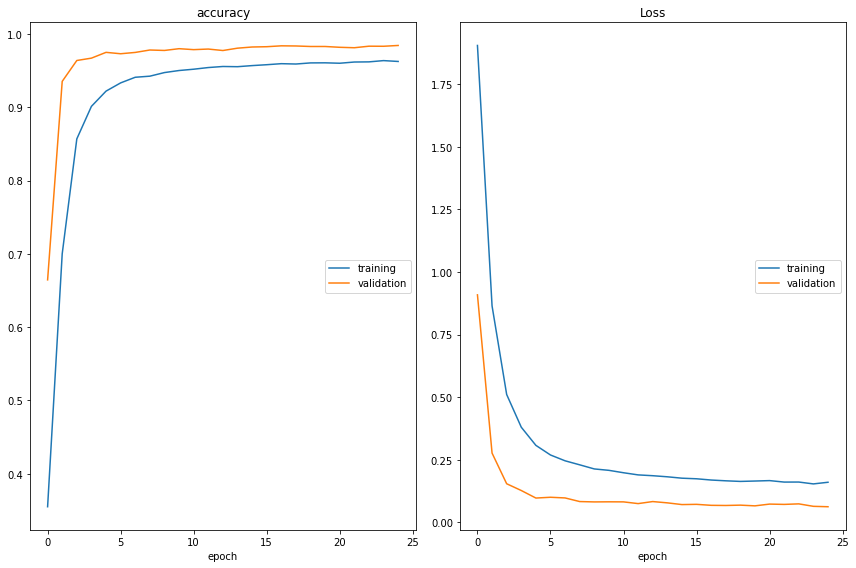

accuracy
	training         	 (min:    0.355, max:    0.964, cur:    0.962)
	validation       	 (min:    0.664, max:    0.984, cur:    0.984)
Loss
	training         	 (min:    0.153, max:    1.905, cur:    0.160)
	validation       	 (min:    0.062, max:    0.909, cur:    0.062)

Epoch 00025: val_loss improved from 0.06380 to 0.06218, saving model to model_weights_part_2_random.h5


In [21]:

r3=model_random.fit(trainX, trainY, validation_data=(testX, testY), epochs=25, batch_size=64,  callbacks=callbacks)

In [22]:
acc = model_random.evaluate(testX, testY)

313/313 [==============================] - 1s 2ms/step - loss: 0.0622 - accuracy: 0.9843


##Evaluation of part 2

The pretrained model performs slighly better than the randomly initialized model. As we can see the accuracy and loss of the pretrained model is 96.8% and 0.13 for training and 98.5% and 0.059 for testing respectively whereas for the randomly initialized model, the accuracy and loss is 96.2% and 0.160 for training and 98.4% and 0.062 for testing. 

From the graph we can see that the convergence time for the pretrained model is also slightly better than the randomly initialized model. The learing graph starts off as more steeper for the pretrained model.


# **Part 3**

In [23]:
from zipfile import ZipFile
file_name = "mnistTask3.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


Now we create a new model using the above function and load the weights from the first training. The task3_path here is th epath to the dataset provided.

In [24]:
model_3_pretrained=create_model()
model_3_pretrained.load_weights('model_weights_2.h5')
model_3_pretrained.summary()
task3_path="mnistTask"

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 11, 11, 48)        27696     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 5, 5, 48)          0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 5, 5, 48)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 3, 3, 64)         

Again we increase the size of the dataset by changing the images slightly.

In [25]:
image_generator = ImageDataGenerator(rescale=1/255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)    
train_dataset_task_3 = image_generator.flow_from_directory(
                                                 directory=task3_path,
                                                 shuffle=True,
                                                 target_size=(28, 28), 
                                                    color_mode="grayscale",
                                                 subset="training",
                                                 class_mode='categorical')

Found 60000 images belonging to 10 classes.


Now, we compile the model and create checkpoints. 

In [26]:
model_3_pretrained.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [27]:
%%time

chkpt = ModelCheckpoint("model_weights_task3_pretrained.h5", monitor='val_loss',verbose=1, save_best_only=True, save_weights_only=True, mode='min')

callbacks = [PlotLossesCallback(), chkpt]

CPU times: user 144 µs, sys: 19 µs, total: 163 µs
Wall time: 170 µs


Next, we train the model the given dataset with the MNIST test set.

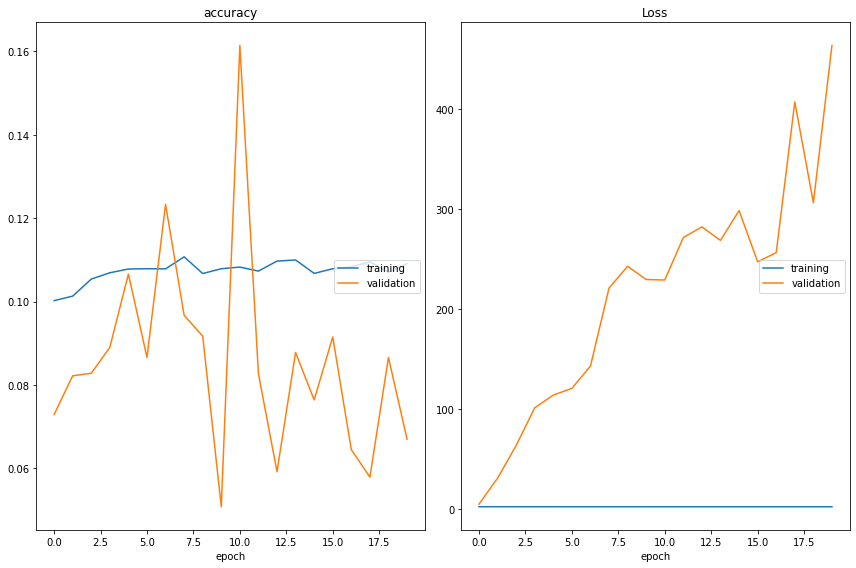

accuracy
	training         	 (min:    0.100, max:    0.111, cur:    0.109)
	validation       	 (min:    0.051, max:    0.161, cur:    0.067)
Loss
	training         	 (min:    2.284, max:    2.303, cur:    2.284)
	validation       	 (min:    4.886, max:  463.240, cur:  463.240)

Epoch 00020: val_loss did not improve from 4.88604


In [28]:

r4=model_3_pretrained.fit(train_dataset_task_3, validation_data=(testX, testY), epochs=20, batch_size=64,  callbacks=callbacks)

In [29]:
model_3_pretrained.evaluate(testX, testY)

313/313 [==============================] - 1s 2ms/step - loss: 463.2404 - accuracy: 0.0670


[463.2403564453125, 0.06700000166893005]

The output graph for the validation is very haphazard. The accuracy for training and validation is 10.9% and 6.7% respectively. The loss for the validation data increases steeply while the loss for the training data remains about the same. 

Next, we train a randomly initialized model on the same data.

In [30]:
model_3_random=create_model()
model_3_random.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


In [31]:
%%time

chkpt = ModelCheckpoint("model_weights_task3_random.h5", monitor='val_loss',verbose=1, save_best_only=True, save_weights_only=True, mode='min')

callbacks = [PlotLossesCallback(), chkpt]

CPU times: user 100 µs, sys: 0 ns, total: 100 µs
Wall time: 105 µs


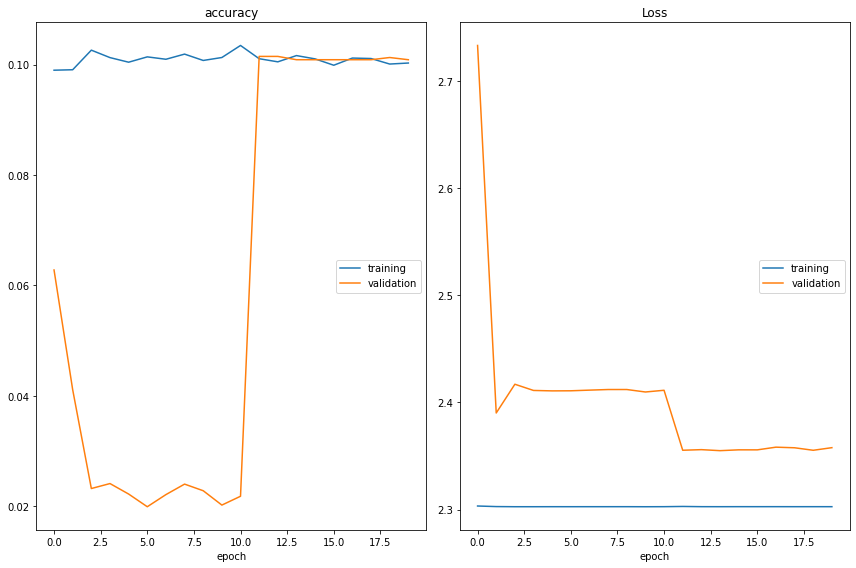

accuracy
	training         	 (min:    0.099, max:    0.103, cur:    0.100)
	validation       	 (min:    0.020, max:    0.101, cur:    0.101)
Loss
	training         	 (min:    2.303, max:    2.303, cur:    2.303)
	validation       	 (min:    2.355, max:    2.733, cur:    2.358)

Epoch 00020: val_loss did not improve from 2.35492


In [32]:
r4=model_3_random.fit(train_dataset_task_3, validation_data=(testX, testY), epochs=20, batch_size=64,  callbacks=callbacks)

In [33]:
model_3_random.evaluate(testX, testY)

313/313 [==============================] - 1s 2ms/step - loss: 2.3577 - accuracy: 0.1009


[2.357712507247925, 0.10090000182390213]

Here, the graph for validation starts haphazardly but then stablizes.

##Evaluation of part 3

The pretrained model performs worse than the randomly initialized model. As we can see the accuracy and loss of the pretrained model is 10.9% and 2.28 for training and 6.7% and 463 (which is very high) for testing respectively whereas for the randomly initialized model, the accuracy and loss is 10.0% and 2.303 for training and 9.6% and 2.359 for testing. 

From the graph we can see that the convergence time for the pretrained model is also worse than the randomly initialized model. 

From this we can know that the first dataset ( 0-9 from the dataset of part 1) is very different from the dataset of the part 3. That is why we get a worse performance on the pretrained model. The performance in general is poor. This shows that each category of the dataset does not have much defining features/charachteristics. 
